# Credit card fraud detection Kaggle dataset

* https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3

Code which inspired this notebook:
* https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now
* http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/combine/plot_smote_enn.html#sphx-glr-auto-examples-combine-plot-smote-enn-py

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

%matplotlib inline

In [2]:
# timing helper functions

def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set")

In [3]:
# set up parallel cluster using ipyparallel engines.
# ipcluster start
import ipyparallel as ipp
from ipyparallel import require
c = ipp.Client(profile='default')
v = c[:]
#print("engines running:",v)
print("engines running:",len(v))

/Users/scheckley/anaconda3/lib/python3.6/site-packages/ipyparallel/util.py:208: RuntimeWarning: IPython could not determine IPs for vii19567: [Errno 8] nodename nor servname provided, or not known
  RuntimeWarning)
/Users/scheckley/anaconda3/lib/python3.6/site-packages/ipyparallel/client/client.py:458: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@vii19567')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


TimeoutError: Hub connection request timed out

## Load the data and clean it up

In [ ]:
data = pd.read_csv("data/creditcard.csv")

In [42]:
normamount = np.array(data['Amount'])
normamount = StandardScaler().fit_transform(normamount.reshape(-1,1))
data['normamount'] = normamount
del data['Amount']
del data['Time']
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normamount
0,-1.4,-0.1,2.5,1.4,-0.3,0.5,0.2,0.1,0.4,0.1,...,-0.0,0.3,-0.1,0.1,0.1,-0.2,0.1,-0.0,0,0.2
1,1.2,0.3,0.2,0.4,0.1,-0.1,-0.1,0.1,-0.3,-0.2,...,-0.2,-0.6,0.1,-0.3,0.2,0.1,-0.0,0.0,0,-0.3
2,-1.4,-1.3,1.8,0.4,-0.5,1.8,0.8,0.2,-1.5,0.2,...,0.2,0.8,0.9,-0.7,-0.3,-0.1,-0.1,-0.1,0,1.2
3,-1.0,-0.2,1.8,-0.9,-0.0,1.2,0.2,0.4,-1.4,-0.1,...,-0.1,0.0,-0.2,-1.2,0.6,-0.2,0.1,0.1,0,0.1
4,-1.2,0.9,1.5,0.4,-0.4,0.1,0.6,-0.3,0.8,0.8,...,-0.0,0.8,-0.1,0.1,-0.2,0.5,0.2,0.2,0,-0.1
5,-0.4,1.0,1.1,-0.2,0.4,-0.0,0.5,0.3,-0.6,-0.4,...,-0.2,-0.6,-0.0,-0.4,-0.2,0.1,0.3,0.1,0,-0.3
6,1.2,0.1,0.0,1.2,0.2,0.3,-0.0,0.1,0.5,-0.1,...,-0.2,-0.3,-0.2,-0.8,0.8,-0.3,0.0,0.0,0,-0.3
7,-0.6,1.4,1.1,-0.5,0.9,0.4,1.1,-3.8,0.6,1.2,...,1.9,-1.0,0.1,-0.6,-0.4,-0.1,-1.2,-1.1,0,-0.2
8,-0.9,0.3,-0.1,-0.3,2.7,3.7,0.4,0.9,-0.4,-0.4,...,-0.1,-0.3,-0.2,1.0,0.4,-0.4,0.0,0.1,0,0.0
9,-0.3,1.1,1.0,-0.2,0.5,-0.2,0.7,0.1,-0.7,-0.4,...,-0.2,-0.6,-0.1,-0.4,-0.1,0.1,0.2,0.1,0,-0.3


Elapsed time is 0.8486583232879639 seconds.


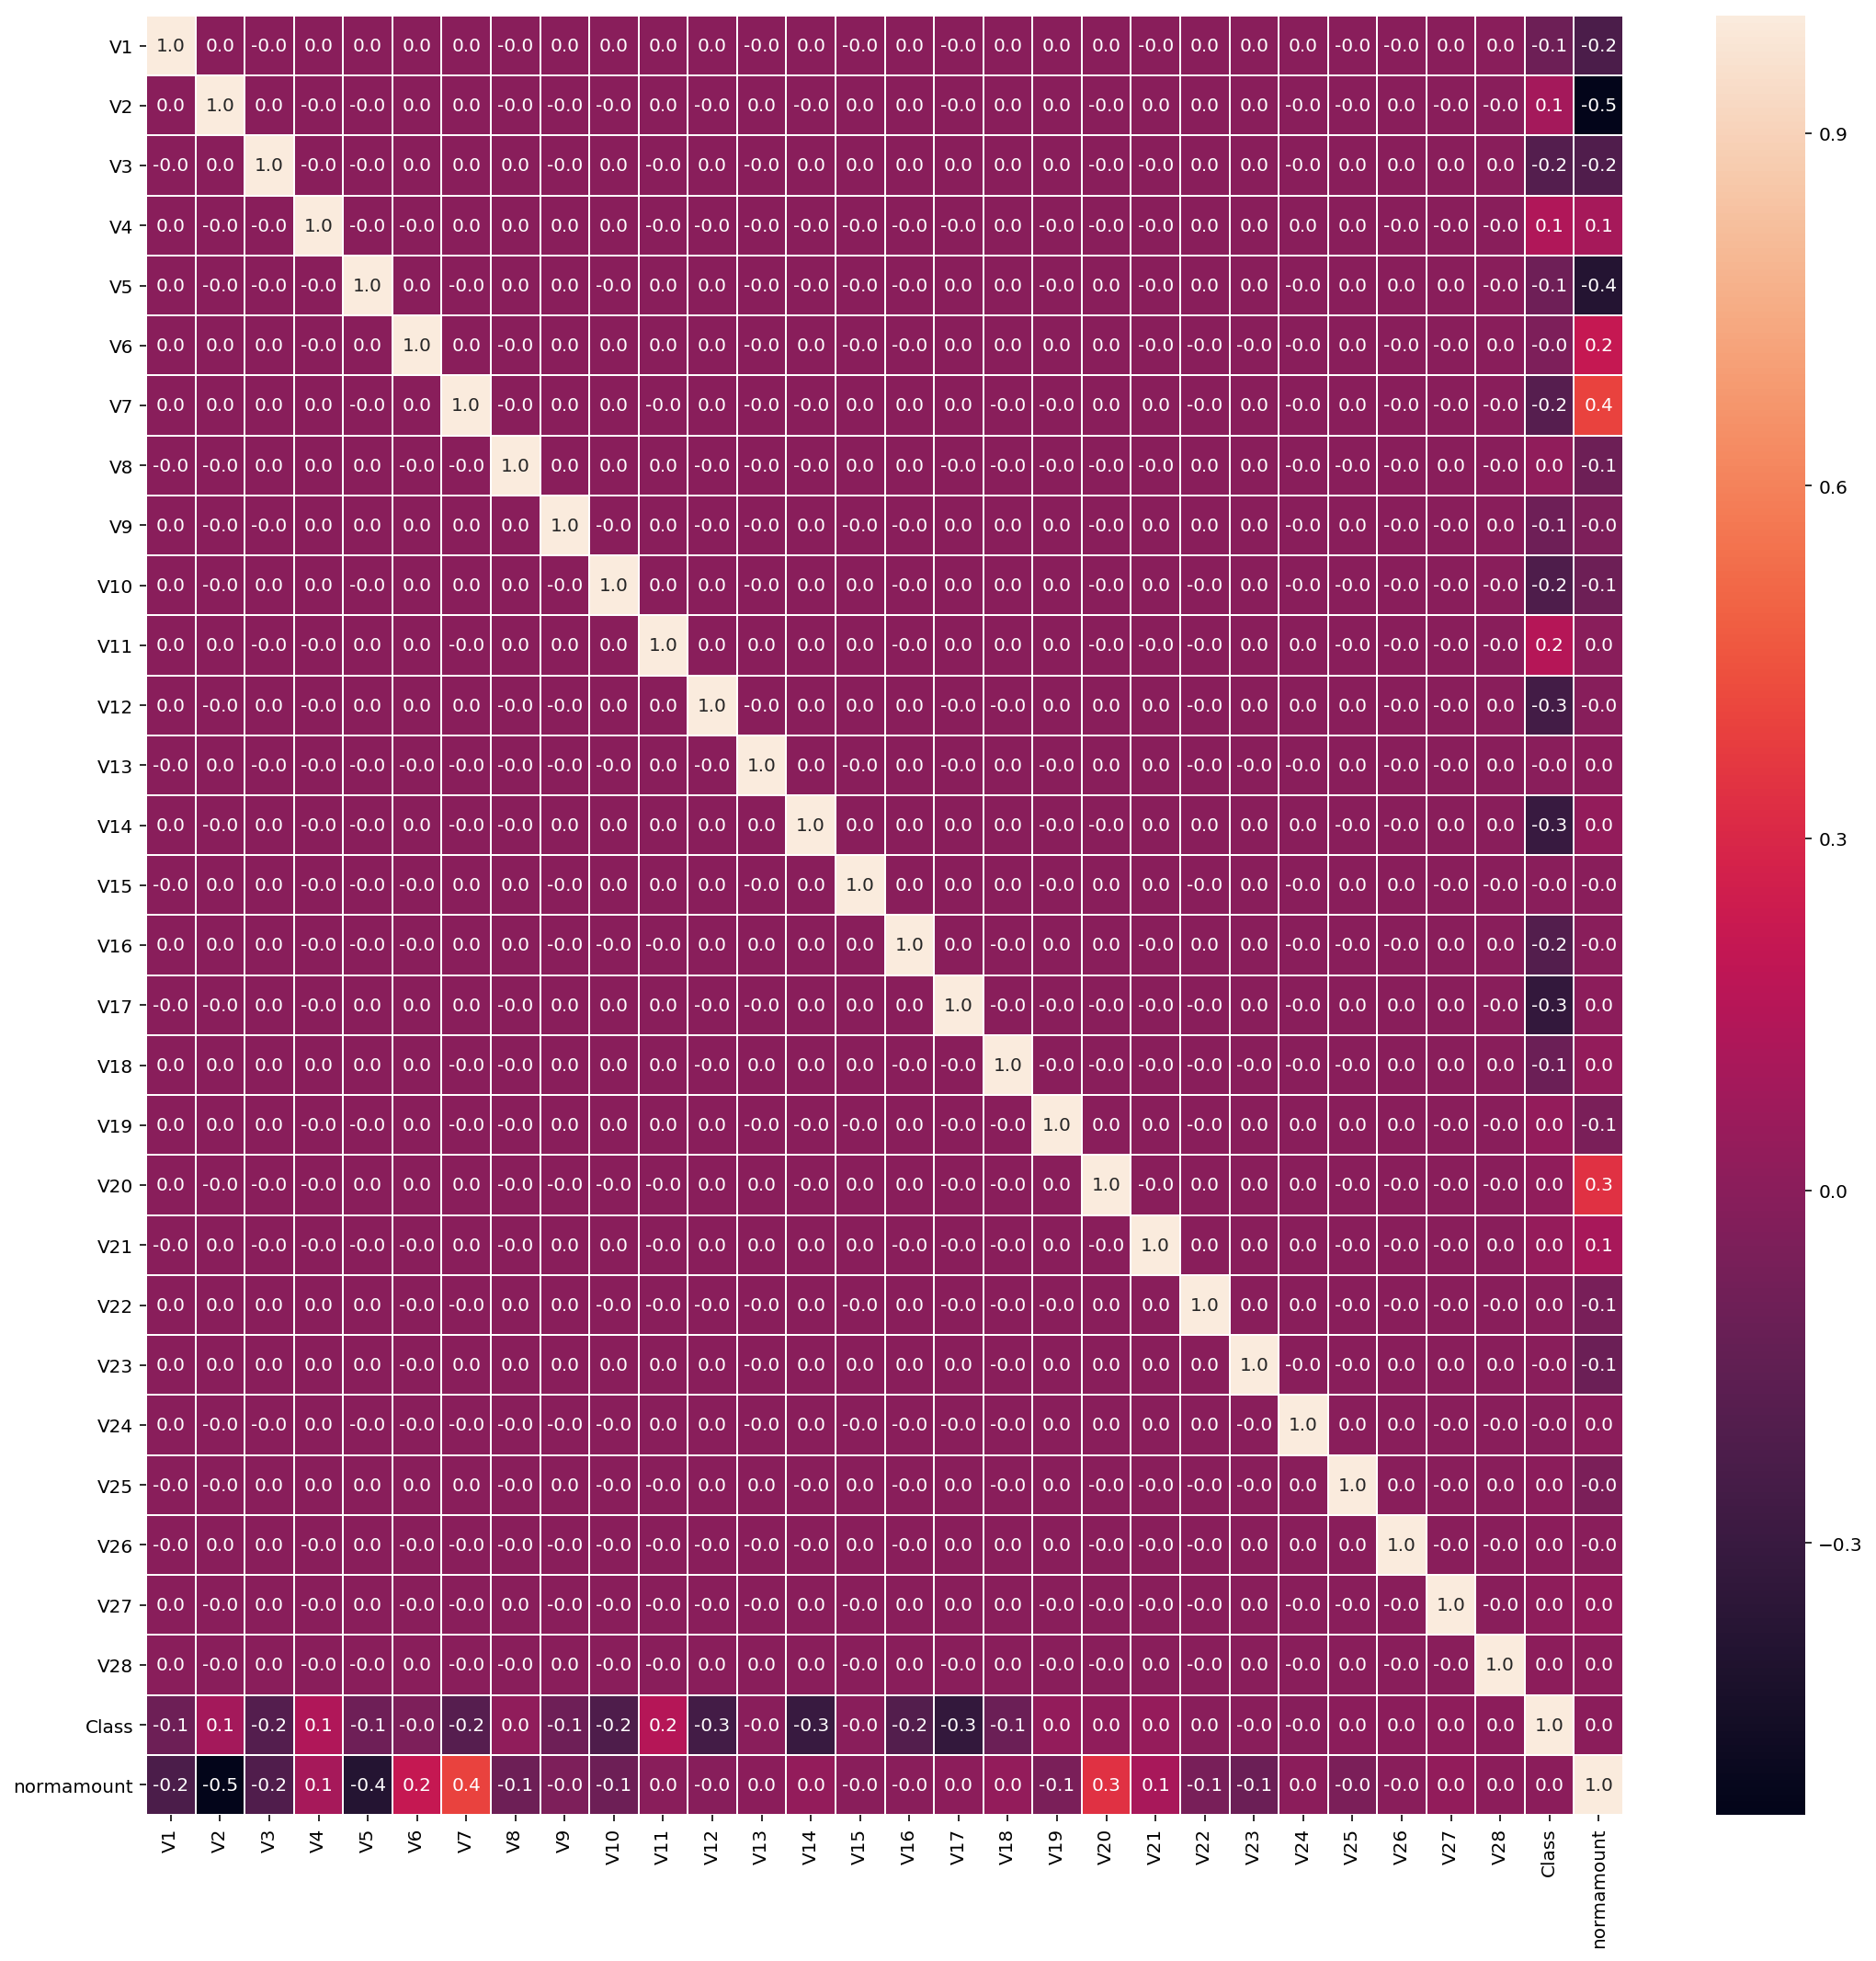

In [4]:
# heat map to look for correlation
tic()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);
toc()

low correlation between features in this dataset.

In [5]:
#look at class imbalance
by_class = data.groupby('Class')
by_class.describe()

V1                                        V10       ...    V9  \
         count mean std   min  25%  50%  75% max    count mean  ...   75%   
Class                                                           ...         
0     284315.0  0.0 1.9 -56.4 -0.9  0.0  1.3 2.5 284315.0  0.0  ...   0.6   
1        492.0 -4.8 6.8 -30.6 -6.0 -2.3 -0.4 2.1    492.0 -5.7  ...  -0.8   

           normamount                                     
       max      count mean std  min  25%  50%  75%   max  
Class                                                     
0     15.6   284315.0 -0.0 1.0 -0.4 -0.3 -0.3 -0.0 102.4  
1      3.4      492.0  0.1 1.0 -0.4 -0.3 -0.3  0.1   8.1  

[2 rows x 232 columns]

The data appears to be quite heavily imbalanced as (obviously), fraudulent transactions should be relatively rare!

Can I use SMOTE over sampling to improve the balance of the data?

In [43]:
# http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.combine.SMOTEENN.html
# http://contrib.scikit-learn.org/imbalanced-learn/stable/combine.html#combine
from imblearn.combine import SMOTEENN
sm = SMOTEENN()

In [44]:
# split the features and target vector for resampling
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

In [48]:
X.columns = X.columns.astype(str)
y.columns = y.columns.astype(str)

In [50]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normamount
0,-1.4,-0.1,2.5,1.4,-0.3,0.5,0.2,0.1,0.4,0.1,...,0.3,-0.0,0.3,-0.1,0.1,0.1,-0.2,0.1,-0.0,0.2
1,1.2,0.3,0.2,0.4,0.1,-0.1,-0.1,0.1,-0.3,-0.2,...,-0.1,-0.2,-0.6,0.1,-0.3,0.2,0.1,-0.0,0.0,-0.3
2,-1.4,-1.3,1.8,0.4,-0.5,1.8,0.8,0.2,-1.5,0.2,...,0.5,0.2,0.8,0.9,-0.7,-0.3,-0.1,-0.1,-0.1,1.2
3,-1.0,-0.2,1.8,-0.9,-0.0,1.2,0.2,0.4,-1.4,-0.1,...,-0.2,-0.1,0.0,-0.2,-1.2,0.6,-0.2,0.1,0.1,0.1
4,-1.2,0.9,1.5,0.4,-0.4,0.1,0.6,-0.3,0.8,0.8,...,0.4,-0.0,0.8,-0.1,0.1,-0.2,0.5,0.2,0.2,-0.1


In [49]:
tic()
#X_resampled, y_resampled = sm.fit_sample(X, y)
toc()
# this step takes a bit of time so I pickled the output

/Users/scheckley/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/scheckley/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time is 602.6411619186401 seconds.


In [51]:
#pickle.dump(X_resampled, open( "X_resampled.pkl", "wb" ))
#pickle.dump(y_resampled, open( "y_resampled.pkl", "wb" ))

In [16]:
X_resampled = pickle.load(open( "X_resampled.pkl", "rb" ))
y_resampled = pickle.load(open( "y_resampled.pkl", "rb" ))

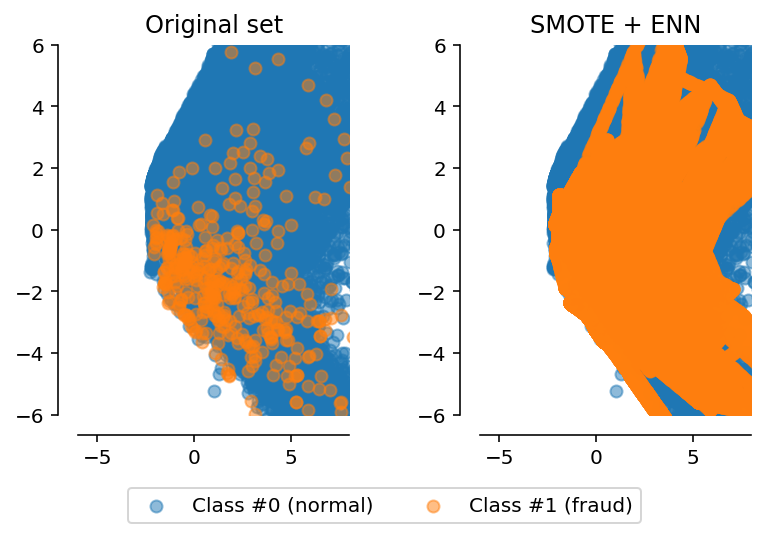

In [17]:
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y['Class'] == 0, 0], X_vis[y['Class'] == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y['Class'] == 1, 0], X_vis[y['Class'] == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + ENN')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

f.legend((c0, c1), ('Class #0 (normal)', 'Class #1 (fraud)'), loc='lower center',
         ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

Prep the new resampled data for machine learning

In [70]:
from sklearn.cross_validation import train_test_split

/Users/scheckley/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.3, random_state = 0)

In [72]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [16]:
#lr = LogisticRegression(C = 0.01, penalty = 'l1')
#lr.fit(X_train,y_train)
#y_pred = lr.predict(X_test)

In [73]:
# try a grid search to find best parameters
from sklearn.model_selection import GridSearchCV
tic()
lr = LogisticRegression(C = 0.01, penalty = 'l1')
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100]}
lr = GridSearchCV(lr, param_grid=grid_values)
lr.fit(X_train,y_train)
print(lr.best_params_)

y_pred = lr.predict(X_test)
toc()

KeyboardInterrupt: 

In [18]:
# confusion matrix plotting function
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9185255441973748


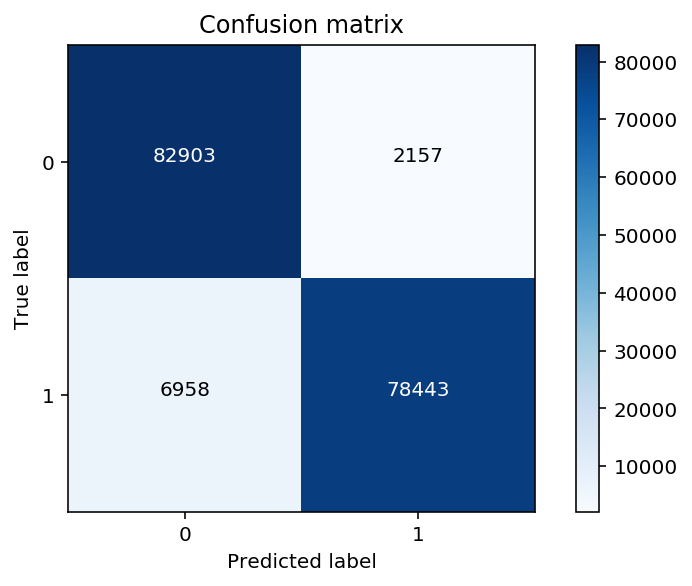

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

# best recall metric = 0.915, with C=0.01
# improved to 0.919 with gridsearch finding l2 penalty and C=10.

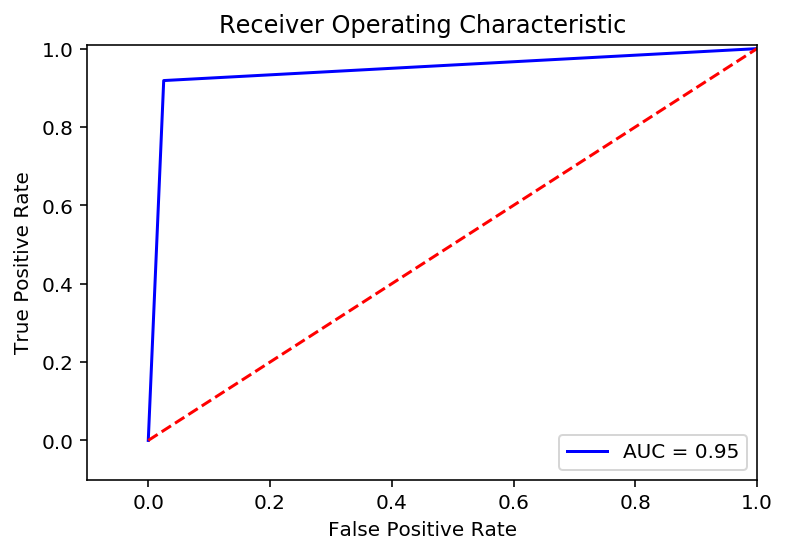

In [20]:
# ROC curve
lr = LogisticRegression(C = 10, penalty = 'l2')
y_pred_score = lr.fit(X_train,y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Tensor flow - 'cos everybody loves a neural network!

In [4]:
import tensorflow as tf
import tensorflow.contrib.learn as skflow
from tensorflow.python.data import Dataset
from sklearn import metrics
import pickle
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split

/Users/scheckley/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
X_resampled = pickle.load(open( "X_resampled.pkl", "rb" ))
y_resampled = pickle.load(open( "y_resampled.pkl", "rb" ))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.3, random_state = 0)

In [7]:
my_features = pd.DataFrame(X_resampled)
targets = pd.DataFrame(y_resampled)

my_features.columns = my_features.columns.astype(str)
targets.columns = targets.columns.astype(str)

In [8]:
import pandas.api.types as ptypes

my_columns = []

for col in my_features.columns:
  if ptypes.is_string_dtype(my_features[col]): #is_string_dtype is pandas function
    my_columns.append(tf.feature_column.categorical_column_with_hash_bucket(col, 
        hash_bucket_size= len(my_features[col].unique())))

  elif ptypes.is_numeric_dtype(my_features[col]): #is_numeric_dtype is pandas function
    my_columns.append(tf.feature_column.numeric_column(col))

In [9]:
feature_columns = my_columns

In [10]:
my_features.shape, targets.shape

((568202, 29), (568202, 1))

In [91]:
# Use gradient descent as the optimizer for training the model.
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/g8/kssh14_n04b8111tck8b_6qr0000gn/T/tmpnr9xo2d7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x100b09048>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [11]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [16]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear classification model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearClassifier` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear classifier object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)  
  linear_classifier = tf.estimator.LinearClassifier(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets, 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets, 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets, 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on training data):")
  training_log_losses = []
  validation_log_losses = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.    
    training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()

  return linear_classifier

In [19]:
linear_regressor = train_linear_regressor_model(
    learning_rate=0.000005,
    steps=500,
    batch_size=20,
    training_examples=my_features,
    training_targets=targets,
    validation_examples=X_test,
    validation_targets=y_test)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/g8/kssh14_n04b8111tck8b_6qr0000gn/T/tmpuasbu3ui', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x132e9ac50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
RMSE (on training data):
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Sav

ValueError: dictionary update sequence element #0 has length 29; 2 is required